# Proyecto Final
Nombre: Bautista Ojeda Yahir

Número de control:  20390017

In [1]:
import pandas as pd 

import numpy as np

from math import ceil

import matplotlib.pyplot as plt

import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

#### Cargar los datos

In [2]:
data = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

#### Data type of columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
data.shape

(100000, 9)

#### Revisar valores nulos

In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#### EDA

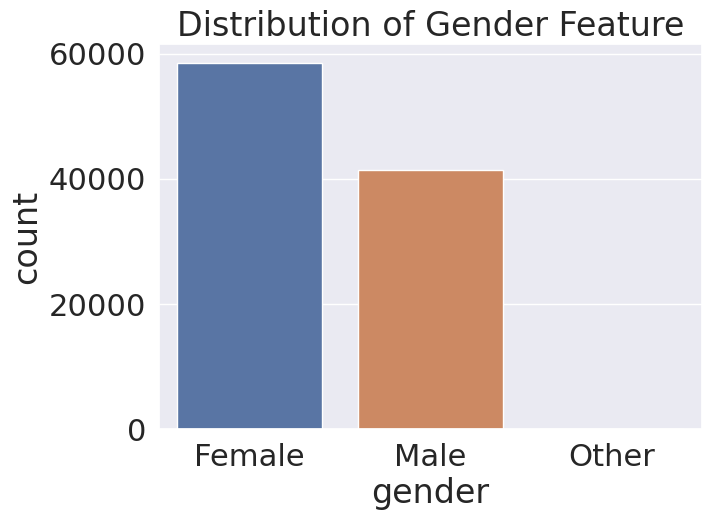

In [7]:
plt.figure(figsize=(7,5))
sns.set(font_scale=2)
sns.countplot(x='gender',data=data);
plt.title("Distribution of Gender Feature");

In [8]:
data.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

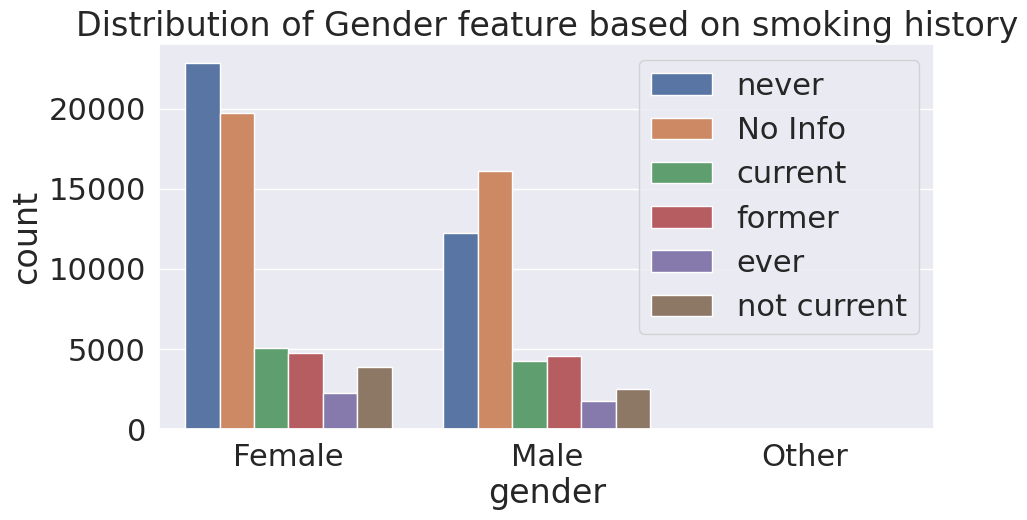

In [9]:
plt.figure(figsize=(10,5));
sns.set(font_scale=2)
sns.countplot(x='gender',data=data,hue='smoking_history');
plt.legend(loc="upper right");
plt.title("Distribution of Gender feature based on smoking history");

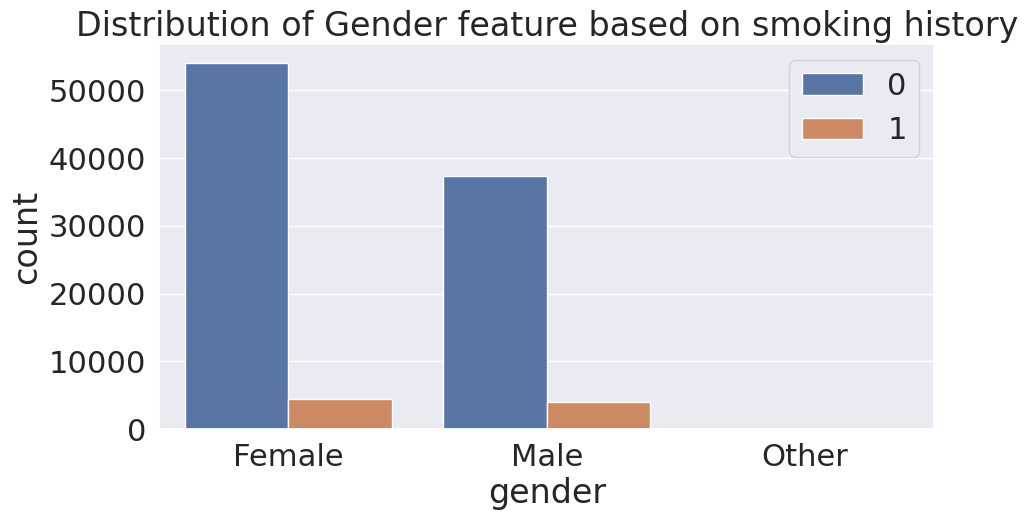

In [10]:
plt.figure(figsize=(10,5));
sns.countplot(x='gender',data=data,hue='diabetes');
plt.legend(loc="upper right");
plt.title("Distribution of Gender feature based on smoking history");

In [11]:
# Filter the data where 'diabetes' is 1
diabetes_data = data[data['diabetes'] == 1]

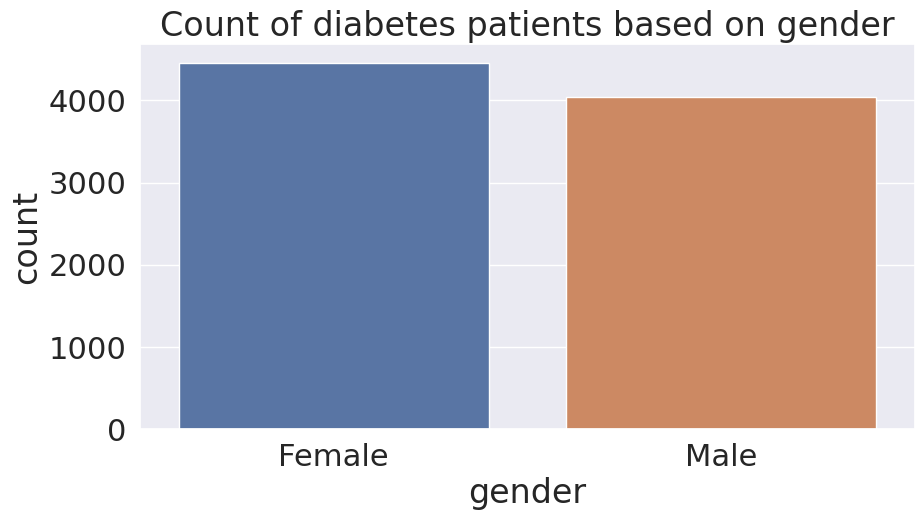

In [12]:
plt.figure(figsize=(10,5));
sns.countplot(x='gender', data=diabetes_data)
plt.title("Count of diabetes patients based on gender");

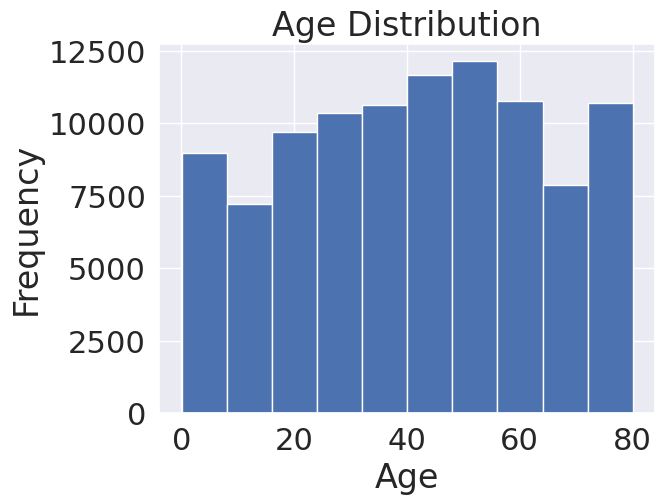

In [13]:
plt.hist(data['age']);
# Set the plot title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

**Hypertension Feature**

In [ ]:
# Count the number of occurrences of hypertension values
hypertension_counts = data['hypertension'].value_counts()

# Calculate the percentage of people with hypertension
hypertension_percentage = hypertension_counts / len(data) * 100

# Create a pie chart
plt.figure(figsize=(10,6))
labels = ['No Hypertension', 'Hypertension']
plt.pie(hypertension_percentage, labels=labels, autopct='%1.1f%%')

# Set the plot title
plt.title('Percentage of People with Hypertension')

# Display the plot
plt.show()

**Heart Disease Feature**

In [ ]:
heart_disease_counts = data['heart_disease'].value_counts()

# Calculate the percentage of people with heart disease
heart_disease_percentage = heart_disease_counts / len(data) * 100

# Create a pie chart
plt.figure(figsize=(10,6))
labels = ['No Heart disease', 'Heart disease']
plt.pie(heart_disease_percentage, labels=labels, autopct='%1.1f%%')

plt.title('Percentage of People with Heart disease')

plt.show()

**Smoking Histroy Feature**

In [ ]:
grouped_data = data.groupby('smoking_history')['diabetes'].mean()

# Create a bar plot
plt.figure(figsize=(12,5))
plt.bar(grouped_data.index, grouped_data.values)

# Set the plot title and labels
plt.title('Proportion of Diabetes Cases by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Proportion of Diabetes Cases')

# Display the plot
plt.show()

#### Split Data

In [15]:
X = data.drop('diabetes',axis=1)
y = data.diabetes

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [17]:
X_train.shape,X_test.shape

((70000, 8), (30000, 8))

#### Data Encoding

In [18]:
def encode_gender(label):
    if label == 'Female':
        return 0
    elif label == 'Male':
        return 1
    else:
        return 2

In [20]:
X_train.gender = X_train.gender.apply(encode_gender)
X_test.gender = X_test.gender.apply(encode_gender)

In [21]:
def encoder_smoking(label):
    if label == 'No Info':
        return 0
    elif label == 'never':
        return 1
    elif label == 'former':
        return 2
    elif label == 'current':
        return 3
    elif label == 'not current':
        return 4
    else:
        return 5

In [22]:
X_train['smoking_history'] = X_train['smoking_history'].apply(encoder_smoking)
X_test['smoking_history'] = X_test['smoking_history'].apply(encoder_smoking)

In [23]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
61308,2,65.0,0,1,0,27.32,4.5,140
14140,2,54.0,0,0,0,27.32,5.8,126
12343,2,47.0,0,0,1,23.19,3.5,145
98870,2,5.0,0,0,0,21.65,4.0,140
94108,2,54.0,0,0,0,53.72,4.8,126


#### Feature selection

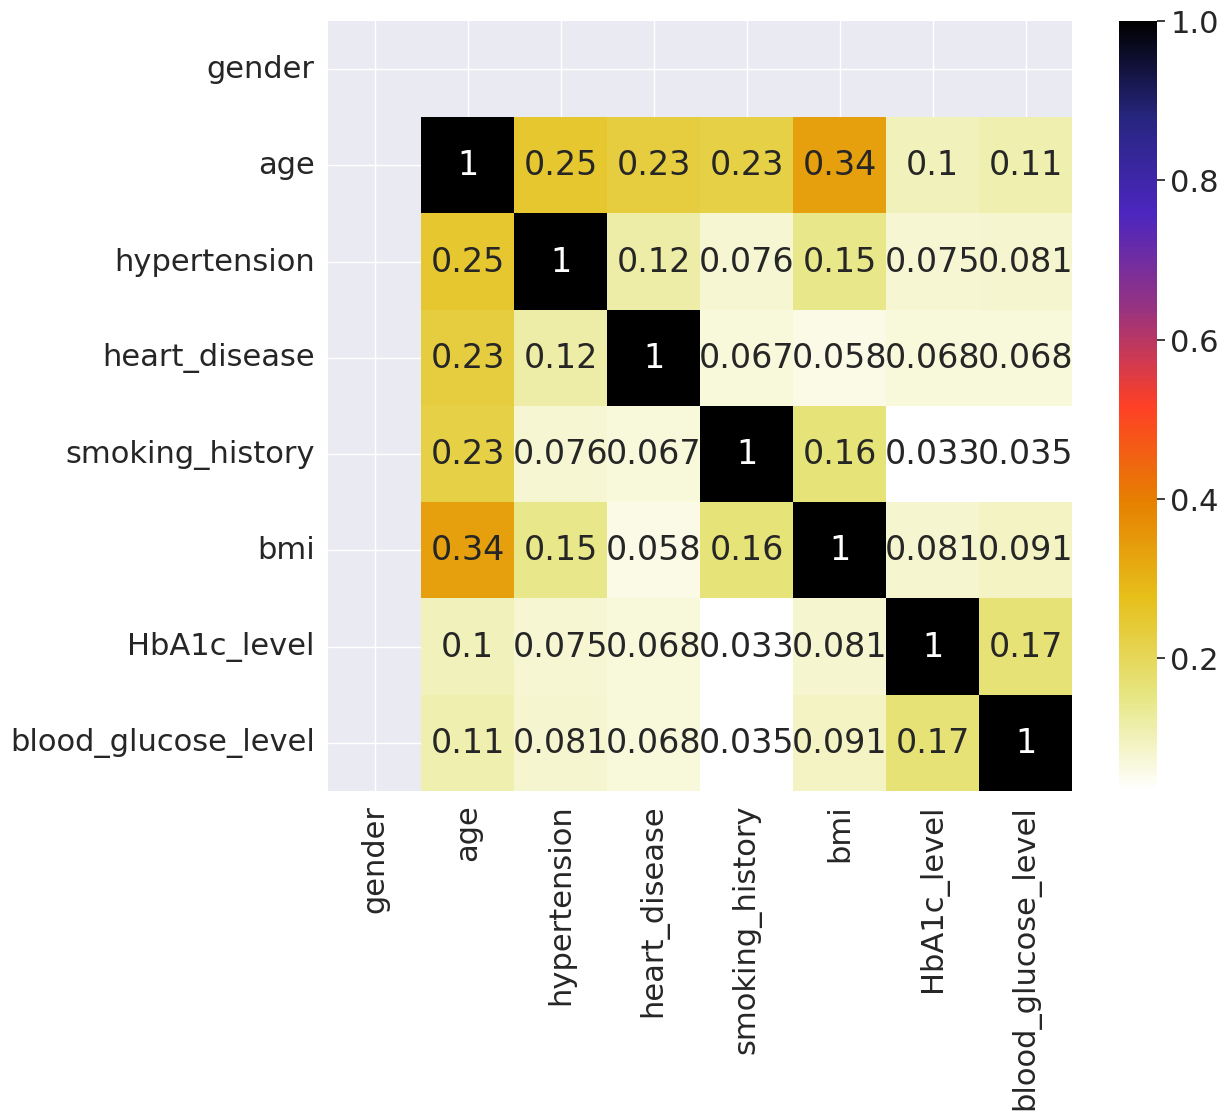

In [24]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r);
plt.show();

**From heatmap we can conclude that no feature is highly correlated to each other.**

In [25]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [26]:
const_cols = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]

In [ ]:
const_cols

**After using VarianceThreshold on training dataset we can say that there is no feature with low variance.**

#### Handle Imbalance Data

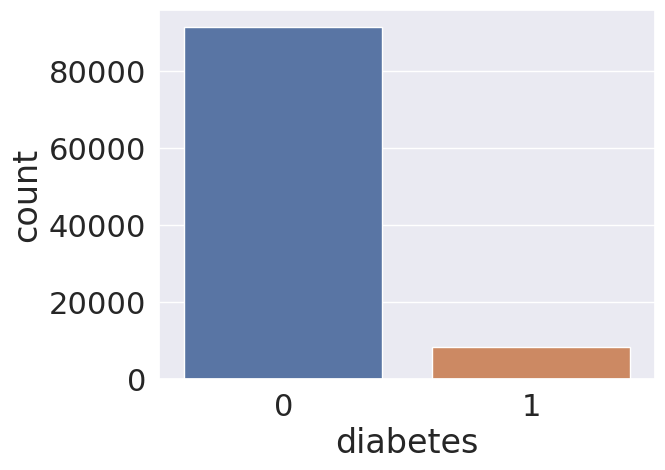

In [27]:
sns.countplot(x='diabetes',data=data);

In [31]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_over, y_over = oversampler.fit_resample(X_train, y_train)

In [32]:
X_over.shape,y_over.shape

((128204, 8), (128204,))

In [33]:
scalar = StandardScaler()

In [34]:
# Fit the scaler on the training data and transform both training and testing data
X_over_scaled = scalar.fit_transform(X_over)
X_test_scaled = scalar.transform(X_test)

#### Model Training

In [35]:
model_names = []
accuracies = []

<h4 style='color:blue'>Logistic Regression</h4>

In [36]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_over_scaled,y_over)
model_names.append('Logistic Regression')
accuracies.append(ceil(log_reg.score(X_test_scaled,y_test)*100))
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     27398
           1       0.42      0.87      0.56      2602

    accuracy                           0.88     30000
   macro avg       0.70      0.88      0.75     30000
weighted avg       0.94      0.88      0.90     30000



<h4 style='color:blue'>k nearest neighbour</h4>

In [37]:
accuracy_rate = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_over_scaled,y_over,cv=3)
    accuracy_rate.append(score.mean())

**Choosing K value**

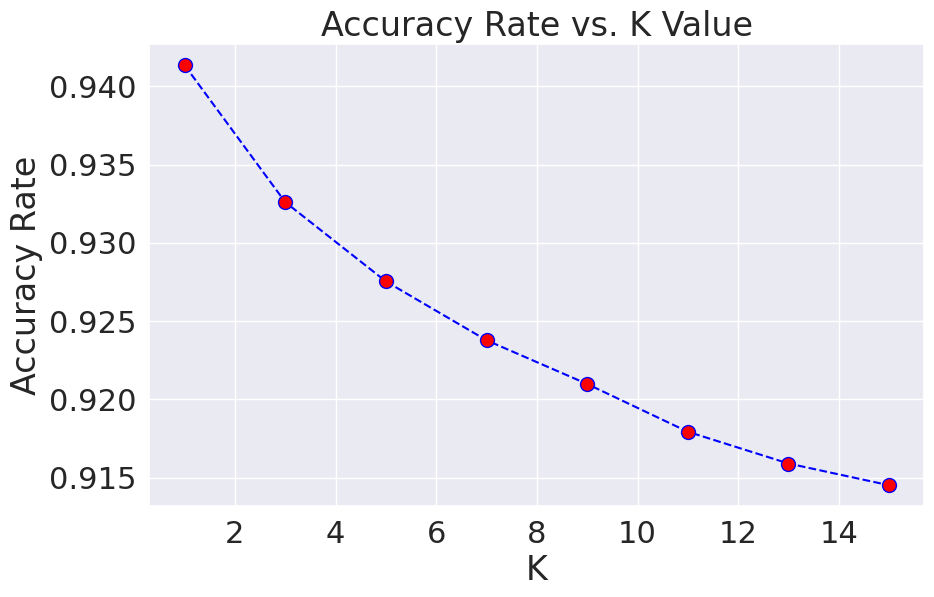

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16,2),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K');
plt.ylabel('Accuracy Rate');

In [41]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_over_scaled,y_over)
model_names.append('KNeighborsClassifier')
accuracies.append(ceil(knn.score(X_test_scaled,y_test)*100))
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     27398
           1       0.61      0.72      0.66      2602

    accuracy                           0.94     30000
   macro avg       0.79      0.84      0.81     30000
weighted avg       0.94      0.94      0.94     30000



<h4 style='color:blue'>Decision tree</h4>

**Decision tree pre-pruning**

In [ ]:
parameter = {
    'criterion':["gini", "entropy", "log_loss"],
    'splitter' :["best", "random"],
    'max_depth':[1,2,3,4,5],
    'max_features':["auto", "sqrt", "log2"],
    'ccp_alpha':[1,2,3,4,5,6,7]
}

In [ ]:
treemodel = DecisionTreeClassifier(max_depth=2)
cv = GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [ ]:
cv.fit(X_over_scaled,y_over)

In [ ]:
cv.best_params_

In [ ]:
y_pred = cv.predict(X_test_scaled)

In [ ]:
model_names.append('Decision Tree')
accuracies.append(ceil(cv.score(X_test_scaled,y_test)*100))

In [ ]:
print(classification_report(y_test,y_pred))

#### Models used and their accuracy

In [ ]:
plt.figure(figsize=(13,6));
plt.bar(model_names, accuracies);

# Set the plot title and labels
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the plot
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [43]:
data['gender'].replace({'Female':0, 'Male':1, 'Other':2}, inplace=True)
data['smoking_history'].replace({'No Info':0, 'current':1, 'ever':2, 'former':3, 'never':4, 'not current':5}, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [44]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [48]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [50]:
# predicating 
y_predLR = log_reg.predict(X_test)

In [51]:
# Confusion Metrix
metrics.confusion_matrix(y_test, y_predLR)

array([[18115,   182],
       [  607,  1096]])

In [52]:
acc_LR = metrics.accuracy_score(y_test, y_predLR)
acc_LR

0.96055

In [53]:
print(metrics.classification_report(y_test, y_predLR))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.86      0.64      0.74      1703

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [54]:
fpr, tpr, thres = metrics.roc_curve(y_test, y_predLR)
metrics.roc_auc_score(y_test, y_predLR)

0.8168115922215267

Text(0, 0.5, 'tpr')

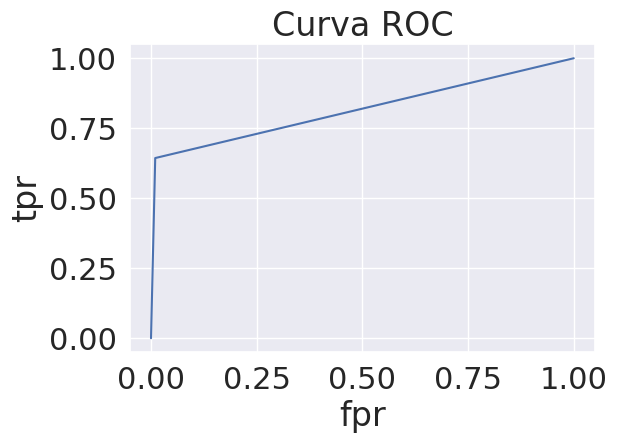

In [55]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.title("Curva ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")